# Notebook Imports and Packages

In [76]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

### $$f(x) = x^2 + x + 1$$

In [77]:
def f(x):
    return x**2 + x + 1

In [78]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=100)

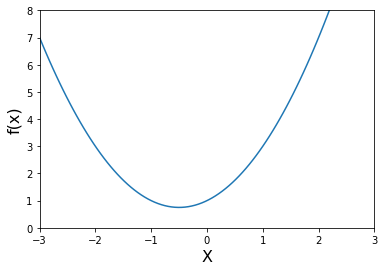

In [79]:
# Plot
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))

## Slope and Derivatives

In [80]:
def df(x):
    return 2*x + 1

## Python Loops and Gradient Descent

In [81]:
# Python For Loop
for n in range(5):
    print('Hello World')

Hello World
Hello World
Hello World
Hello World
Hello World


In [82]:
# Python while loop
counter=0
while counter <7:
    print('Counting...', counter)
    counter = counter + 1
print('Ready or not, here I come!')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Counting... 5
Counting... 6
Ready or not, here I come!


In [83]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(300):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope or df(x) value at this point is: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


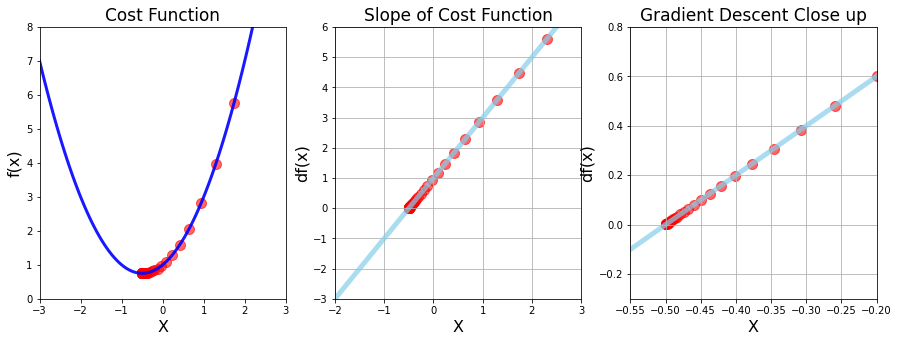

In [84]:
# Superimprose the gradient descent calculations

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,3,1)

plt.xlim([-3,3])
plt.ylim(0,8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), c='blue', lw=3, alpha = 0.9)

values = np.array(x_list) #convert list to an array for scatter plot
plt.scatter(x_list, f(values), c='red', s=100 , alpha = 0.6) #create scatter plot

# 2 Chart: Derivative
plt.subplot(1,3,2)

plt.xlim([-2,3])
plt.ylim(-3,6)
plt.grid()

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(x_list, slope_list, c='red', s=100, alpha=0.6)


# 3 Chart: Derivative (Close up)
plt.subplot(1,3,3)

plt.xlim([-0.55,-0.2])
plt.ylim(-0.3,0.8)
plt.grid()

plt.title('Gradient Descent Close up', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(x_list, slope_list, c='red', s=100, alpha=0.6)

## Example 2 - Mulitple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 -4x^2 + 5$$

In [85]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 -4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

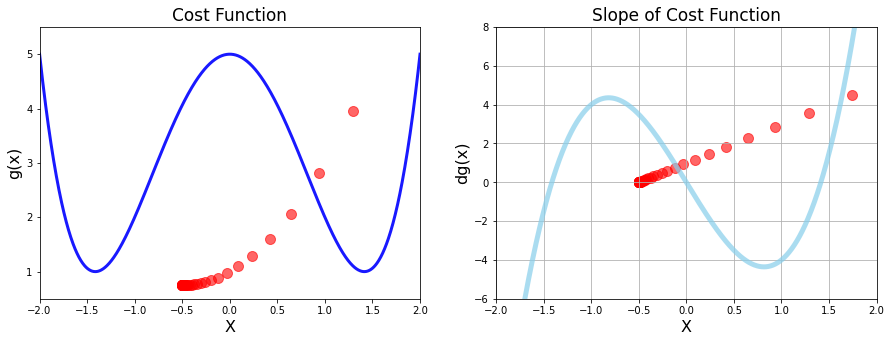

In [86]:
# Superimprose the gradient descent calculations

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), c='blue', lw=3, alpha = 0.9)

values = np.array(x_list) #convert list to an array for scatter plot
plt.scatter(x_list, f(values), c='red', s=100 , alpha = 0.6) #create scatter plot

# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(x_list, slope_list, c='red', s=100, alpha=0.6)


### Gradient Descent as a Python Function

In [99]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=500):
    # crtl + ] to indent whole highlighted group of text

    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(300):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        # print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list


In [88]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess = -0.5, 
                                                 multiplier=0.02, precision= 0.001) #this is defining the return values as three variables in this order (new_x=local_min, x_list=list_x), slope_list=deriv_list
print('Local min occuras at:', local_min)
print('Number of steps:', len(list_x))


Local min occuras at: -1.4122375085019094
Number of steps: 23


In [89]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001) #this is defining the return values as three variables in this order (new_x=local_min, x_list=list_x), slope_list=deriv_list
print('Local min occuras at:', local_min)
print('Number of steps:', len(list_x))

Local min occuras at: 1.4122375085019094
Number of steps: 23


In [90]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess = -0.1
                                                 ) #this is defining the return values as three variables in this order (new_x=local_min, x_list=list_x), slope_list=deriv_list
print('Local min occuras at:', local_min)
print('Number of steps:', len(list_x))


Local min occuras at: -1.4120887490901561
Number of steps: 34


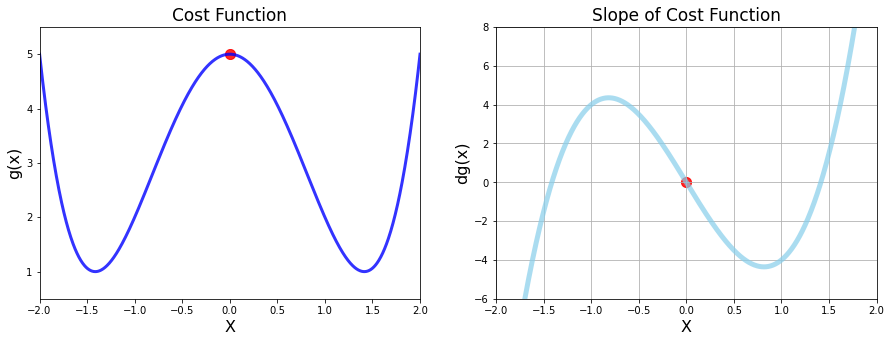

In [91]:
# Calling gradient decent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess = 0)
                                                 

# PLot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), c='blue', lw=3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), c='red', s=100, alpha=0.6)

values = np.array(x_list) #convert list to an array for scatter plot


# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(list_x, deriv_list, c='red', s=100, alpha=0.6)


# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x)  =x^5 -2x^4 +2$$

In [92]:
# Make data
x_3 = np.linspace(start=2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 +2

def dh(x):
    return 5*x**4 - 8*x**3

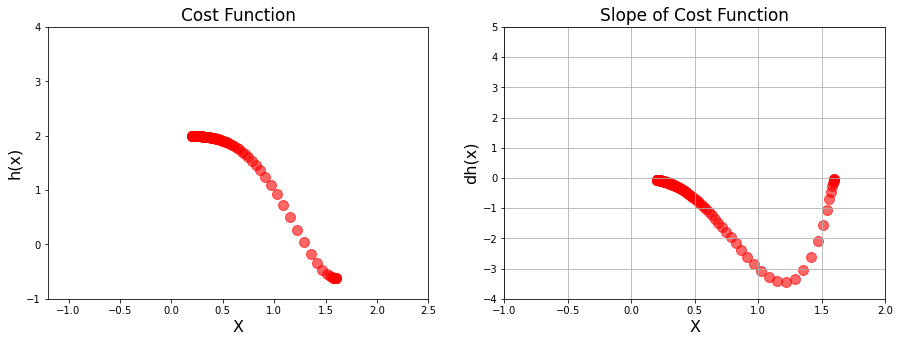

Local Min occurs at: 1.5989534547394717
Cost at this minum is : -0.6214287992331258
Number of steps: 117


In [93]:
# Calling gradient decent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess = 0.2)
                                                 

# PLot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), c='red', s=100, alpha=0.6)

values = np.array(x_list) #convert list to an array for scatter plot


# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(list_x, deriv_list, c='red', s=100, alpha=0.6)

plt.show()

print('Local Min occurs at:', local_min)
print('Cost at this minum is :', h(local_min))
print('Number of steps:', len(list_x))


In [94]:
import sys

In [95]:
type(h(local_min))

float

In [96]:
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [97]:
# Creating a tuple - tuple packing
breakfast = 'bacon','eggs','avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I looooove', breakfast[0] + '!')
print('My hotel has no ' + str(unlucky_numbers[3])+ 'th floor.')

main, side, greens = breakfast

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min', data_tuple[0])

I looooove bacon!
My hotel has no 26th floor.
Local min 1.5989534547394717


# The Learning Rate

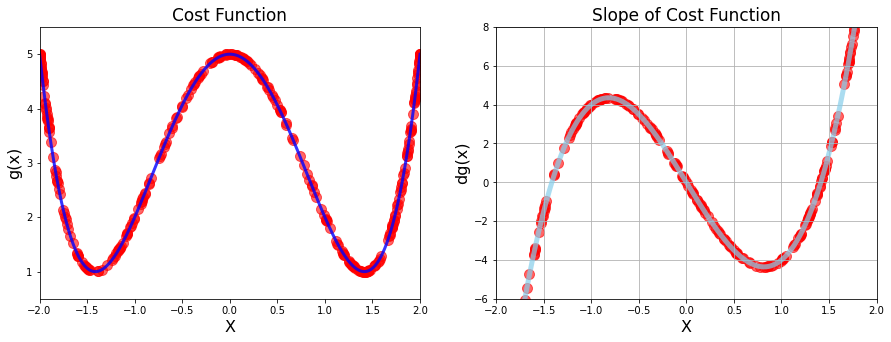

In [100]:
# Calling gradient decent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess = 1.9, multiplier=0.25, max_iter=500)
                                                 

# PLot function and derivative and scatter plot side by side

plt.figure(figsize = [15,5])

# 1 Chart: Cost Function
plt.subplot(1,2,1)

plt.xlim([-2,2])
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), c='blue', lw=3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), c='red', s=100, alpha=0.6)

values = np.array(x_list) #convert list to an array for scatter plot


# 2 Chart: Derivative
plt.subplot(1,2,2)

plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()

plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), c='skyblue', lw=5, alpha = 0.7)
plt.scatter(list_x, deriv_list, c='red', s=100, alpha=0.6)
